(-1, 22.101763953069455) (-1, 22.16611113124053)
(-1, 23.90016734595384) (-1, 24.384050505637802)
(-1, 19.91826317942587) (-1, 20.200654385878053)
(-1, 20.385174962088765) (-1, 20.91132781172242)
[ 1.  3.  5.  7.  9. 11. 13. 15. 17. 19. 21. 23. 25. 27. 29. 31. 33. 35.
 37. 39. 41. 43. 45. 47. 49.]


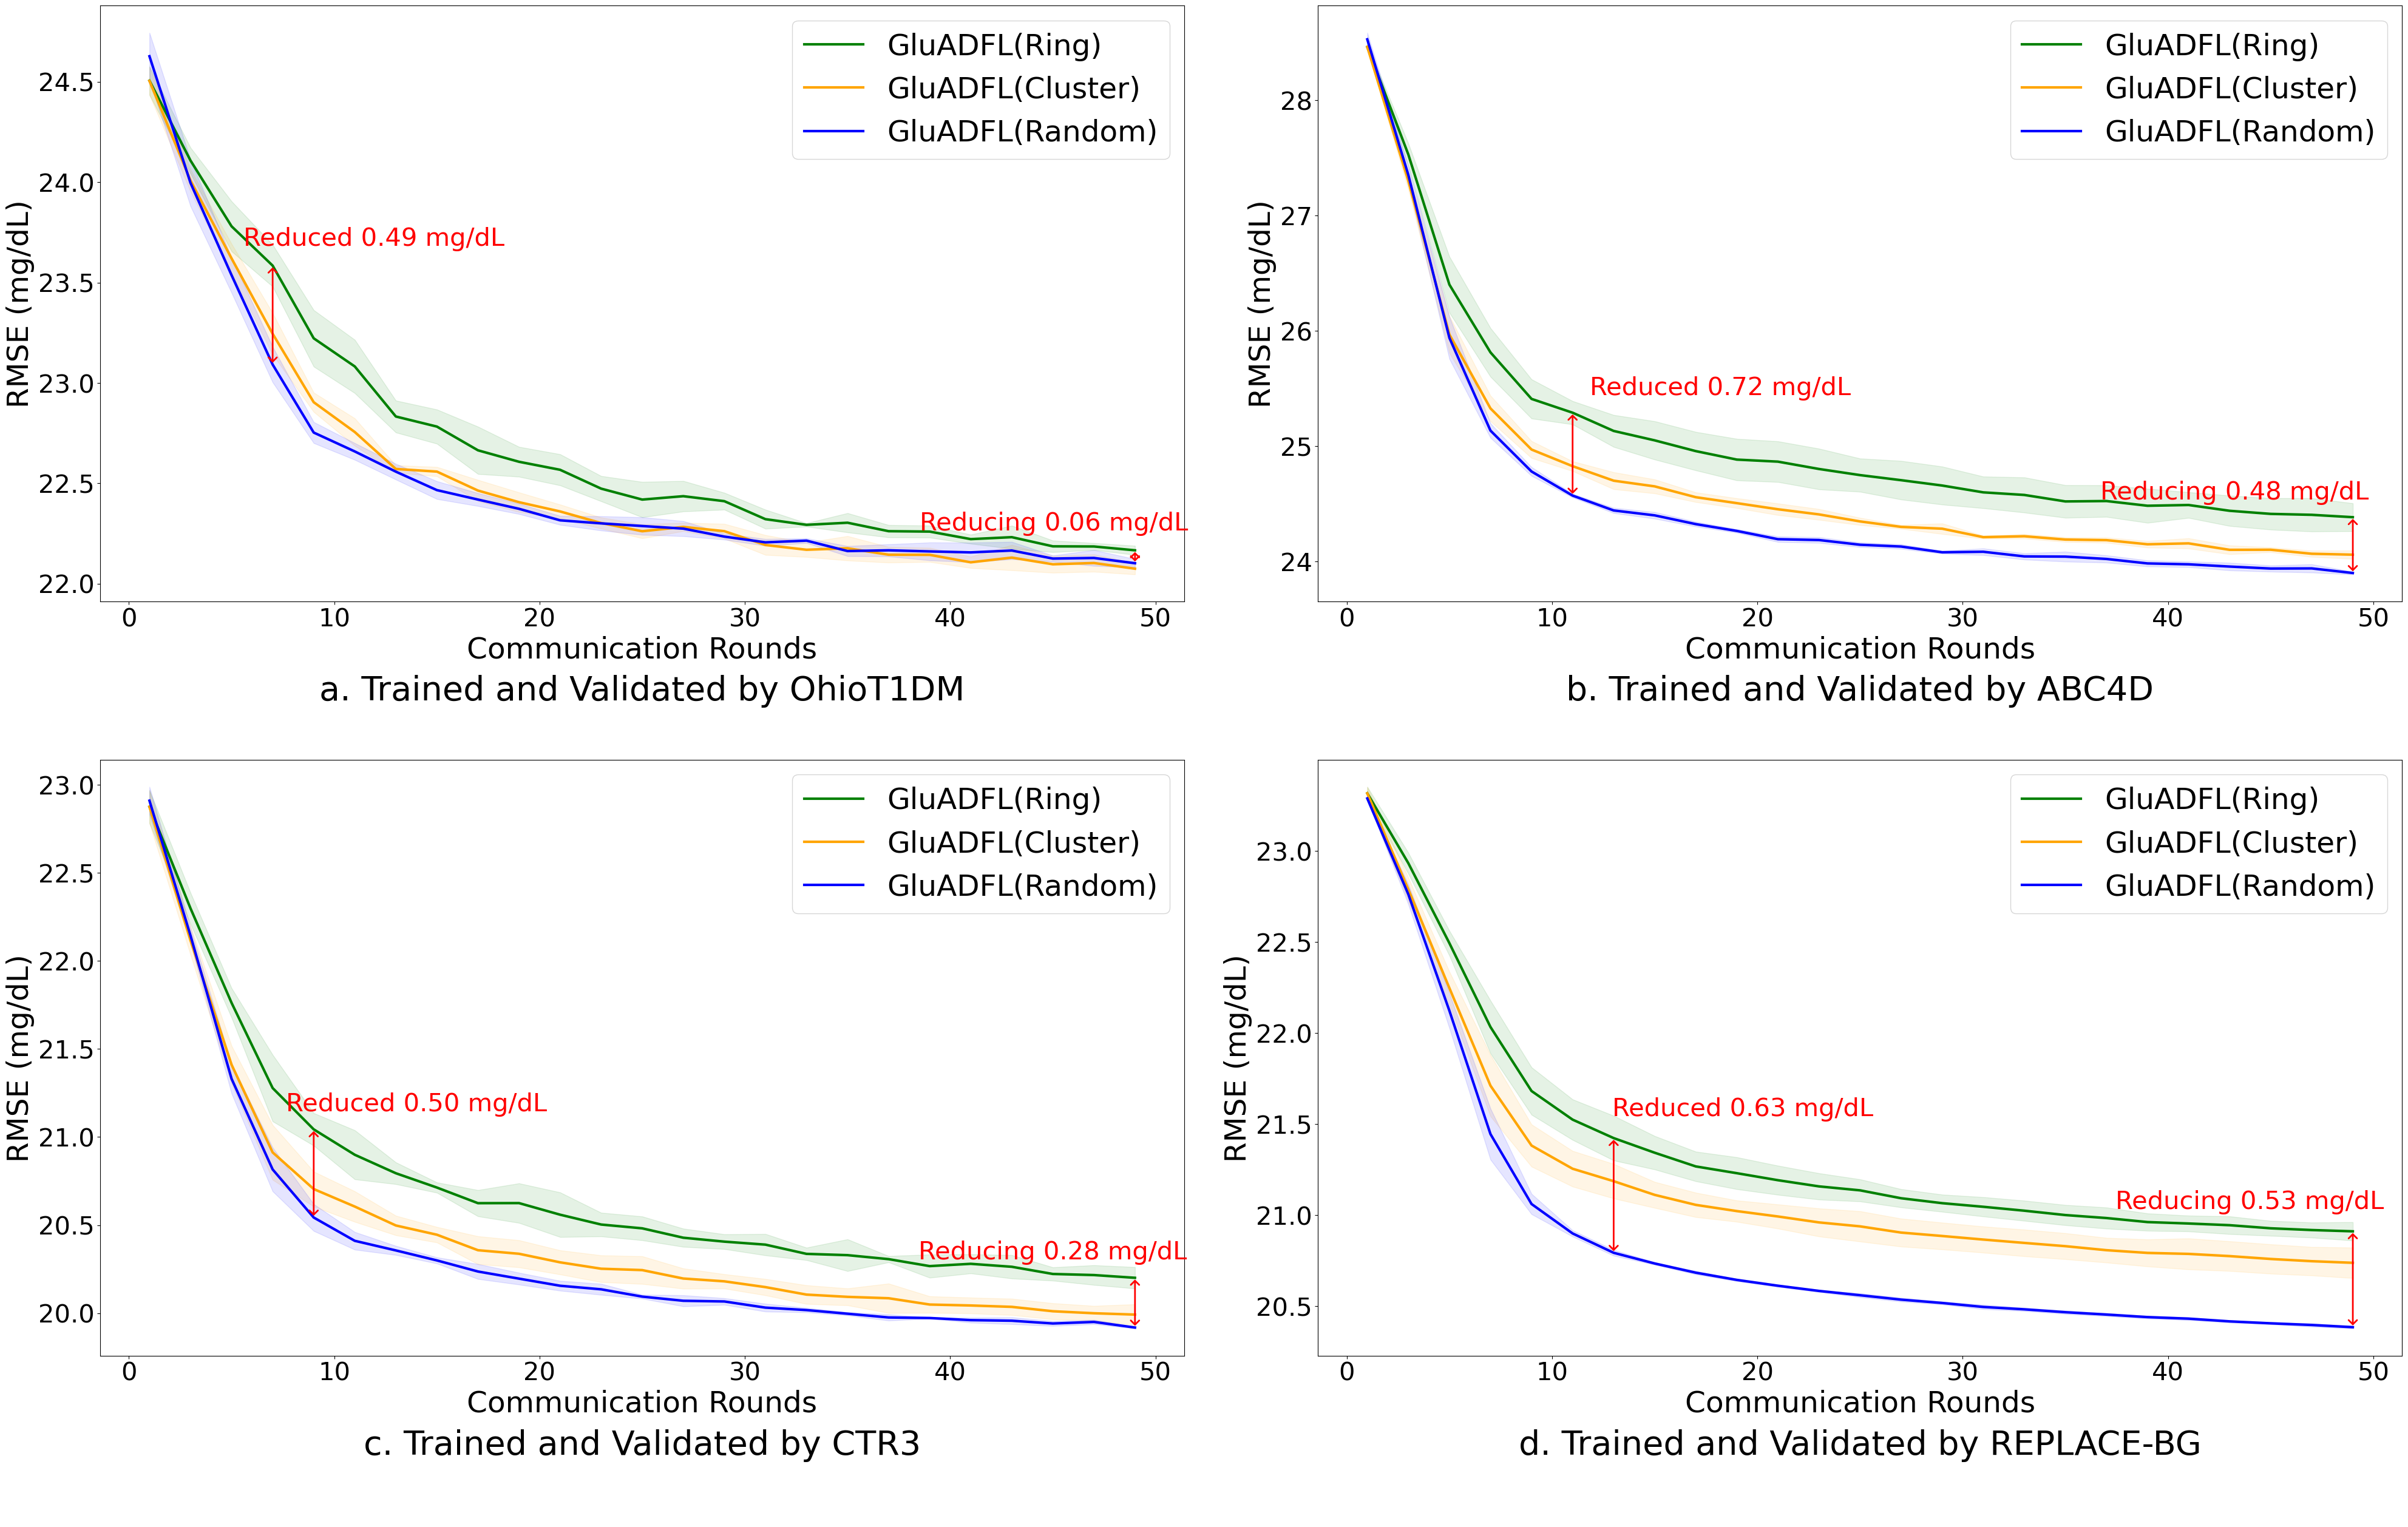

In [36]:
import xlwt
import os
import numpy as np
import matplotlib.pylab as plt


is_30 = True

dataset_list = ['ohio', 'abc4d', 'ctr3_cgm_only', 'replace-bg']
# dataset_list = ['ohio']

print_dataset = {
    'ohio': 'OhioT1DM',
    'replace-bg': 'REPLACE-BG',
    'arises': 'ARISES',
    'ctr3_cgm_only': 'CTR3',
    'abc4d': 'ABC4D',
}
if is_30:
    print_method = {

        # 'exp_2': 'FedAvg+LSTM',
        'exp_6' : 'GluADFL(Ring)',
        'exp_8' : 'GluADFL(Cluster)',
        'exp_5': 'GluADFL(Random)',

    }
else:
    print_method = {

        # 'exp_2_ph_60': 'FedAvg+LSTM',
        'exp_6_ph_60' : 'Ring+LSTM',
        'exp_8_ph_60' : 'Cluster+LSTM',
        'exp_5_ph_60': 'GluADFL+LSTM',

    }

version = 'coldstart_fl'

metric = 'rmse'

f, axs = plt.subplots(figsize = (40, 25), nrows=2, ncols=2)
# experiment_version = 'exp_5'

axs = axs.flat

color_list = [
    # 'blue', 
    'green', 'orange', 'blue']
subtitles = ['a', 'b', 'c', 'd']
seeds = [1, 2, 3, 4]
for r, load_dataset in enumerate(dataset_list):
    ax = axs[r]
    method_rmse = []
    for c, temp_experiment_version in enumerate(print_method):
        seed_rmse_mean = []
        for seed in seeds:
            experiment_version = temp_experiment_version + '_seed_' + str(seed) if seed != 1 else temp_experiment_version
            epochs_rmse = np.load(f'D:/code_log/{version}/{experiment_version}/{load_dataset}/{load_dataset}_lstm_/epoch_rmse.npy')
            epochs_rmse_mean = epochs_rmse.mean(axis=1)
            seed_rmse_mean.append(epochs_rmse_mean[None, ...])
        epochs = np.load(f'D:/code_log/{version}/{experiment_version}/{load_dataset}/{load_dataset}_lstm_/epoch_rmse_idx.npy')
        seed_rmse_mean = np.concatenate(seed_rmse_mean, axis=0)
        epochs_rmse_mean = seed_rmse_mean.mean(axis=0)
        epochs_rmse_std = seed_rmse_mean.std(axis=0)
        lower = epochs_rmse_mean - epochs_rmse_std
        upper = epochs_rmse_mean + epochs_rmse_std

        ax.plot(epochs/100, epochs_rmse_mean, color=color_list[c],
                    label = print_method[temp_experiment_version], linewidth=3
                    )
        ax.fill_between(epochs/100, lower, upper, color=color_list[c], alpha=.1)
        method_rmse.append(epochs_rmse_mean)
        
    max_rmse = max(method_rmse[0] - method_rmse[-1])
    max_rmse_idx = np.argmax(method_rmse[0] - method_rmse[-1])
    # ax.annotate('Arrows', xy=(max_rmse_idx, method_rmse[-1][max_rmse_idx]), xytext=(max_rmse_idx, method_rmse[0][max_rmse_idx]),
    #         arrowprops=dict(arrowstyle='<->', color='red'))
    
    vertical_offset = (method_rmse[0][max_rmse_idx] - method_rmse[-1][max_rmse_idx]) * 0.1  # Adjust this factor as needed.

    # Update the annotation with adjusted text positioning and alignment.
    ax.annotate(
        '',  # Use an empty string if you don't want text but just the arrow.
        xy=(epochs[max_rmse_idx]/100, method_rmse[-1][max_rmse_idx]),  # Pointing to
        xytext=(epochs[max_rmse_idx]/100, method_rmse[0][max_rmse_idx]),  # Text and arrow start point
        textcoords='data',  # Coordinate system for text: 'offset points' or 'data'
        arrowprops=dict(arrowstyle='<->, head_length=0.5,head_width=0.5', lw=2, color='red'),
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment
    )
    
        # Optionally, if you want to include text describing the arrow, use a separate text() call.
    # print_out_1 = (method_rmse[0][max_rmse_idx] - method_rmse[-1][max_rmse_idx])/method_rmse[0][max_rmse_idx] * 100
    print_out_1 = (method_rmse[0][max_rmse_idx] - method_rmse[-1][max_rmse_idx])
    
    ax.text(
        epochs[max_rmse_idx]/100 + vertical_offset * 100, 
        method_rmse[0][max_rmse_idx] + vertical_offset + (vertical_offset * 0.5),  # Adjust this for text placement
        f'Reduced {print_out_1:.2f} mg/dL', 
        ha='center', 
        va='bottom',
        fontsize=30,  # Adjust font size as needed
        color = 'red'
    )
    
        # Update the annotation with adjusted text positioning and alignment.
        
    max_rmse_idx = -1
    ax.annotate(
        '',  # Use an empty string if you don't want text but just the arrow.
        xy=(epochs[max_rmse_idx]/100, method_rmse[-1][max_rmse_idx]),  # Pointing to
        xytext=(epochs[max_rmse_idx]/100, method_rmse[0][max_rmse_idx]),  # Text and arrow start point
        textcoords='data',  # Coordinate system for text: 'offset points' or 'data'
        arrowprops=dict(arrowstyle='<->, head_length=0.5,head_width=0.5', lw=2, color='red'),
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment
    )
    
        # Optionally, if you want to include text describing the arrow, use a separate text() call.
    # print_out_1 = (method_rmse[0][max_rmse_idx] - method_rmse[-1][max_rmse_idx])/method_rmse[0][max_rmse_idx] * 100
    print_out_1 = (method_rmse[0][max_rmse_idx] - method_rmse[-1][max_rmse_idx])
    
    ax.text(
        epochs[max_rmse_idx]/100 - vertical_offset * 80, 
        method_rmse[0][max_rmse_idx] + vertical_offset + (vertical_offset * 0.5),  # Adjust this for text placement
        f'Reducing {print_out_1:.2f} mg/dL', 
        ha='center', 
        va='bottom',
        fontsize=30,  # Adjust font size as needed
        color = 'red'
    )
    
    print((max_rmse_idx, method_rmse[-1][max_rmse_idx]), (max_rmse_idx, method_rmse[0][max_rmse_idx]))
    ax.legend(fontsize=35)
    ax.tick_params(axis='x', labelsize=30)
    # ax.set_xticks(ticks=epochs)
    # ax.set_xticklabels(epochs, fontsize=30)
    # ax.set_xticklabels([0.1, 0.3, 0.5], fontsize=30)
    ax.tick_params(axis='y', labelsize=30)
    ax.set_xlabel('Communication Rounds', fontsize=35)
    ax.set_ylabel('RMSE (mg/dL)', fontsize=35 )
    # ax.set_title(subtitles[r], loc='lower center', fontsize=40)
    # ax.set_title(print_dataset[load_dataset], fontsize=35)
    ax.text(0.5, -0.15, subtitles[r] + '. Trained and Validated by ' + print_dataset[load_dataset], ha='center', va='center', transform=ax.transAxes, fontsize=40)
    ax.text(0.5, -0.25, ' ', ha='center', va='center', transform=ax.transAxes, fontsize=40)
plt.tight_layout()
if is_30:
    plt.savefig(f'./summary/rmse_by_epochs.pdf') 
else:
    plt.savefig(f'./summary/rmse_by_epochs_ph_60.pdf') 
print(epochs/100)